# Read Energy Output from SeisSol Simulation

https://seissol.readthedocs.io/en/latest/energy-output.html?highlight=energy#id1

**Gravitational energy = energy in tsunami** *= tsunami potential energy*

**Acoustic energy = compressional energy in the ocean = recoverable internal energy associated with compressing or expanding the water**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

In [3]:
#link = "/import/freenas-m-05-seissol/kutschera/HIWI/fully-coupled/HFFZ/output_o6_II/HFFZ_fullycp_o6_newmaster-energy.csv"
#link = "/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o4_longrun/HFFZ_full-energy.csv"
link = "/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o4_180s/HFFZ_fullycp-energy.csv"

In [4]:
df = pd.read_csv(link)
df.head()

,time,gravitational_energy,acoustic_energy,acoustic_kinetic_energy,elastic_energy,elastic_kinetic_energy,total_frictional_work,static_frictional_work,seismic_moment,plastic_moment
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.1,1.459860e-116,5.952280e-111,9.405370e-111,1.425470e+11,4.801640e+10,1.984550e+11,1.370370e+11,7.334840e+14,0.0
2,0.2,8.033030e-63,6.283810e-59,1.382970e-58,1.103410e+12,3.796960e+11,1.532680e+12,1.085580e+12,5.467870e+15,0.0
3,0.3,5.378280e-50,1.397500e-45,1.503810e-45,3.579480e+12,1.192400e+12,4.871940e+12,3.554220e+12,1.740980e+16,0.0
4,0.4,3.182410e-42,3.976320e-38,7.044620e-38,8.078580e+12,2.576030e+12,1.081610e+13,8.074230e+12,3.945320e+16,0.0


M0 = 1.31297e+20 and Mw = 7.3455032020168485.


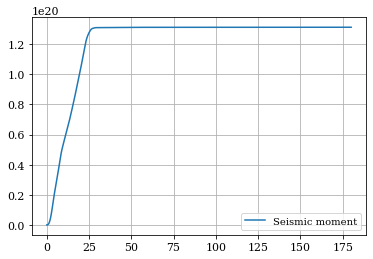

In [5]:
plt.plot(df['time'],df['seismic_moment'], label='Seismic moment')
plt.legend()
plt.grid()
M0 = df['seismic_moment'][len(df)-1]
Mw = 2/3 * (np.log10(M0) - 9.1)
print("M0 = {} and Mw = {}.".format(M0, Mw))

Text(0.5, 0, 'Time [s]')

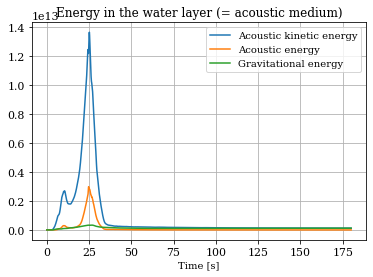

In [6]:
plt.plot(df['time'],df['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
plt.plot(df['time'],df['acoustic_energy'], label='Acoustic energy')
plt.plot(df['time'],df['gravitational_energy'], label='Gravitational energy')
plt.legend()
plt.grid()
plt.title("Energy in the water layer (= acoustic medium)")
plt.xlabel('Time [s]')
#plt.xlim(0,40)

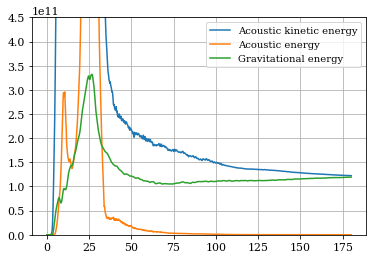

In [7]:
plt.plot(df['time'],df['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
plt.plot(df['time'],df['acoustic_energy'], label='Acoustic energy')
plt.plot(df['time'],df['gravitational_energy'], label='Gravitational energy')
plt.ylim([0,4.5e11])
#plt.xlim([70,80])
plt.legend(loc="upper right")
#from intersect import intersection
#x,y = intersection(df['gravitational_energy'],df['acoustic_energy'])
plt.grid()

Text(0.5, 0, 'Time [s]')

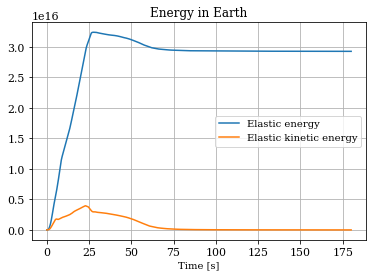

In [8]:
plt.plot(df['time'],df['elastic_energy'], label='Elastic energy')
plt.plot(df['time'],df['elastic_kinetic_energy'], label='Elastic kinetic energy')
plt.legend()
plt.grid()
plt.title("Energy in Earth")
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

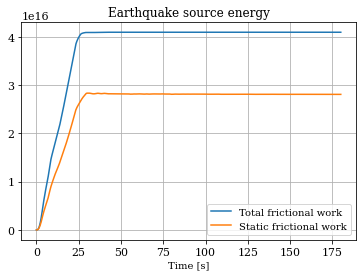

In [9]:
plt.plot(df['time'],df['total_frictional_work'], label='Total frictional work')
plt.plot(df['time'],df['static_frictional_work'], label='Static frictional work')
plt.legend()
plt.grid()
plt.title("Earthquake source energy")
plt.xlabel('Time [s]')

In [10]:
## ATTENTION - probably wrong!
#TsunamiPotEnergy = 0
#for i in range(len(df)):
#    TsunamiPotEnergy += df['gravitational_energy'][i]
#print("{:.2e} Joule.".format(TsunamiPotEnergy))

In [11]:
E_TS_theoretical_max = 10 ** (2.0 * Mw - 1.7)
E_EQ = 10 ** (1.5 * Mw + 4.5)
print("E_TS_theoretical_max = {:.2} and E_EQ = {:.2}.".format(E_TS_theoretical_max, E_EQ))

E_TS_theoretical_max = 9.8e+12 and E_EQ = 3.3e+15.


In [12]:
E_TS = 10 ** (2.33 * Mw - 5.59)
print("E_TS = {:.2f}".format(E_TS))

E_TS = 334982763238.28


In [13]:
GPE = df['gravitational_energy']
GPE_TS_max = max(GPE)
print("GPE_TS_max = {:.2f}".format(GPE_TS_max))

GPE_TS_max = 332114000000.00


326


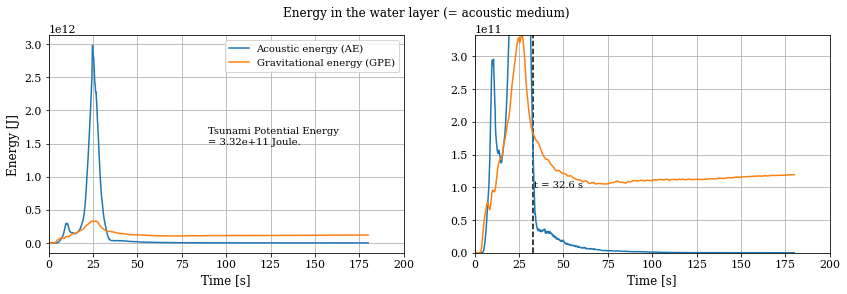

In [24]:
AE = df['acoustic_energy']
GPE = df['gravitational_energy']
KE = df['acoustic_kinetic_energy']

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_figwidth(14)
fig.suptitle("Energy in the water layer (= acoustic medium)")

#ax1.plot(df['time'], KE, label='Acoustic kinetic energy (KE)')
ax1.plot(df['time'], AE, label='Acoustic energy (AE)')
ax1.plot(df['time'], GPE, label='Gravitational energy (GPE)')
ax1.grid()
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Energy [J]', fontsize=12)
# Tsunami Potential Energy is probably wrong!
ax1.text(x=max(df['time'])/2,y=max(AE)/2, s="Tsunami Potential Energy \n= {:.2e} Joule.".format(GPE_TS_max), rotation=0)
ax1.legend()

#ax2.plot(df['time'], KE, label='Acoustic kinetic energy (KE)')
ax2.plot(df['time'], AE, label='Acoustic energy (AE)')
ax2.plot(df['time'], GPE, label='Gravitational energy (GPE)')
ax2.grid()
ax2.set_xlabel('Time [s]', fontsize=12)
#ax2.set_ylabel('Energy [J]', fontsize=12)
ax2.set_ylim([0,max(GPE)])


idx = np.argwhere(np.diff(np.sign(AE - GPE))).flatten()
last_index = idx[len(idx)-1]
ax2.vlines(df['time'][last_index], 0, max(GPE), colors='k', linestyles='dashed', label="t = {} s".format(df['time'][last_index]))
ax2.text(x=df['time'][last_index+10],y=1e11, s="t = {} s".format(df['time'][last_index]), rotation=0)
ax2.set_xlim(0,200)
#ax2.legend()

print(idx[len(idx)-1])

plt.savefig("./output/energy-output.png", dpi=300)